In [ ]:
Aisha Beevi K M                                                                                 4-11-2022

# Multi Layer Perceptron

In [70]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import MLPRegressor

In [71]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [72]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [73]:
#Extracting Independent and dependent Variable
y=df['Outcome']
print(y)
df=df.drop(['Outcome'],axis=1)
x= df
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70      

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


In [75]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.52941176 0.44949495 0.50819672 ... 0.33532042 0.02732707 0.2       ]
 [0.05882353 0.5959596  0.47540984 ... 0.49627422 0.07813834 0.03333333]
 [0.         0.45959596 0.6557377  ... 0.4828614  0.22331341 0.1       ]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.23996584 0.8       ]]


In [76]:
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
classifier.fit(x_train,y_train)
x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
print(y_test.shape)
print(y_pred.shape)

(192,)
(192,)


In [78]:
print(y_pred.shape)
print(y_test.shape)

(192,)
(192,)


In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[96 34]
 [10 52]]


In [80]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_train, x_pred)
print(cm1)

[[325  45]
 [ 79 127]]


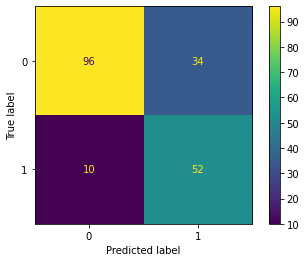

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label=0)))

Accuracy score: 0.7708333333333334
Precision score: 0.9056603773584906
Recall score: 0.7384615384615385
F1 score: 0.8135593220338984


In [83]:
classifier.coefs_
##classifier.intercepts_

[array([[-4.43040940e-01, -1.52040210e-01,  8.68558397e-02,
          6.54116228e-01, -6.27322435e-12, -3.99097261e-12,
         -5.22129680e-02,  2.13257259e-01],
        [-2.73590330e-01,  8.05061783e-01, -7.53956606e-01,
          5.94386955e-01,  6.17407256e-27, -3.79728688e-03,
         -8.97062384e-02,  1.20166931e-01],
        [ 3.70526689e-01, -1.72412533e-01,  2.77308906e-01,
          3.05740135e-01, -2.28560779e-06, -1.69198933e-03,
         -1.77528698e-02,  1.67379748e-01],
        [-2.56768085e-01, -1.19518043e-01,  4.32721154e-01,
          6.63442793e-01,  6.48524356e-04,  2.05527017e-27,
         -6.16521823e-01,  5.78881732e-01],
        [ 5.77101970e-02, -4.61816000e-01,  2.13516845e-02,
          2.68769518e-01,  6.03333342e-04, -6.58648272e-04,
         -4.55205587e-01,  1.12453526e-01],
        [-3.19610653e-01,  3.35602104e-01,  8.27359026e-02,
          6.82213529e-01, -4.45623334e-03,  2.30527164e-07,
         -3.69706834e-01, -5.47557111e-01],
        [ 1.9288

In [84]:
classifier.intercepts_

[array([ 0.43688168, -0.28109507,  0.57028516,  0.12649147, -0.5023846 ,
        -0.50338044,  0.59260164,  0.80488392]),
 array([-0.32971611,  0.61470752,  0.06760803,  0.01795195,  0.52212823,
         0.60028646, -0.35776979,  0.49409337]),
 array([-0.59643419, -0.02160808, -0.35939395, -0.48677954, -0.58147353,
        -0.56136957,  0.17774978,  0.6285074 ]),
 array([0.15987351])]